In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv("C:\\Users\\ANAS\\Desktop\\Assignment\\Decision Trees\\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [7]:
data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [8]:
data['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [9]:
data.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool>

In [10]:
data['Taxable.Income'] = pd.cut(data['Taxable.Income'], bins=[0,30000,99620], labels=['risky', 'good'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,good,39492,7,YES
596,YES,Divorced,good,55369,2,YES
597,NO,Divorced,good,154058,0,YES
598,YES,Married,good,180083,17,NO


In [11]:
data = data.rename(columns={'Taxable.Income': 'TaxIn',
                        'Marital.Status': 'Marital',
                         'City.Population': 'Population',
                         'Work.Experience' :'Experience'})

In [12]:
data['TaxIn']=data['TaxIn'].map({'risky':0,'good':1})

In [13]:
data

,Undergrad,Marital,TaxIn,Population,Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,1,39492,7,YES
596,YES,Divorced,1,55369,2,YES
597,NO,Divorced,1,154058,0,YES
598,YES,Married,1,180083,17,NO


In [14]:
label_encoder = preprocessing.LabelEncoder()

data['Urban']= label_encoder.fit_transform(data['Urban'])
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Marital']= label_encoder.fit_transform(data['Marital'])
data['TaxIn']=label_encoder.fit_transform(data['TaxIn'])

In [15]:
data

,Undergrad,Marital,TaxIn,Population,Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [16]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [17]:
df_norm = norm_func(data)

In [18]:
x=data.iloc[:,0:2].join(data.iloc[:, 3:])
y=data['TaxIn']

In [19]:
#x=data.iloc[:,[0, 1, 3, 4, 5]]
#y=data['TaxIn']

In [20]:
df_norm.TaxIn.value_counts()

1.0    476
0.0    124
Name: TaxIn, dtype: int64

In [21]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [22]:
Model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
Model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

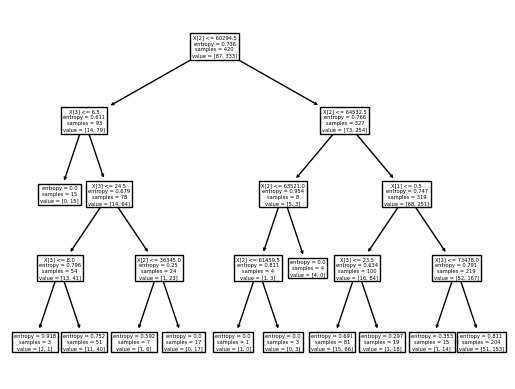

In [23]:
tree.plot_tree(Model)
plt.show()

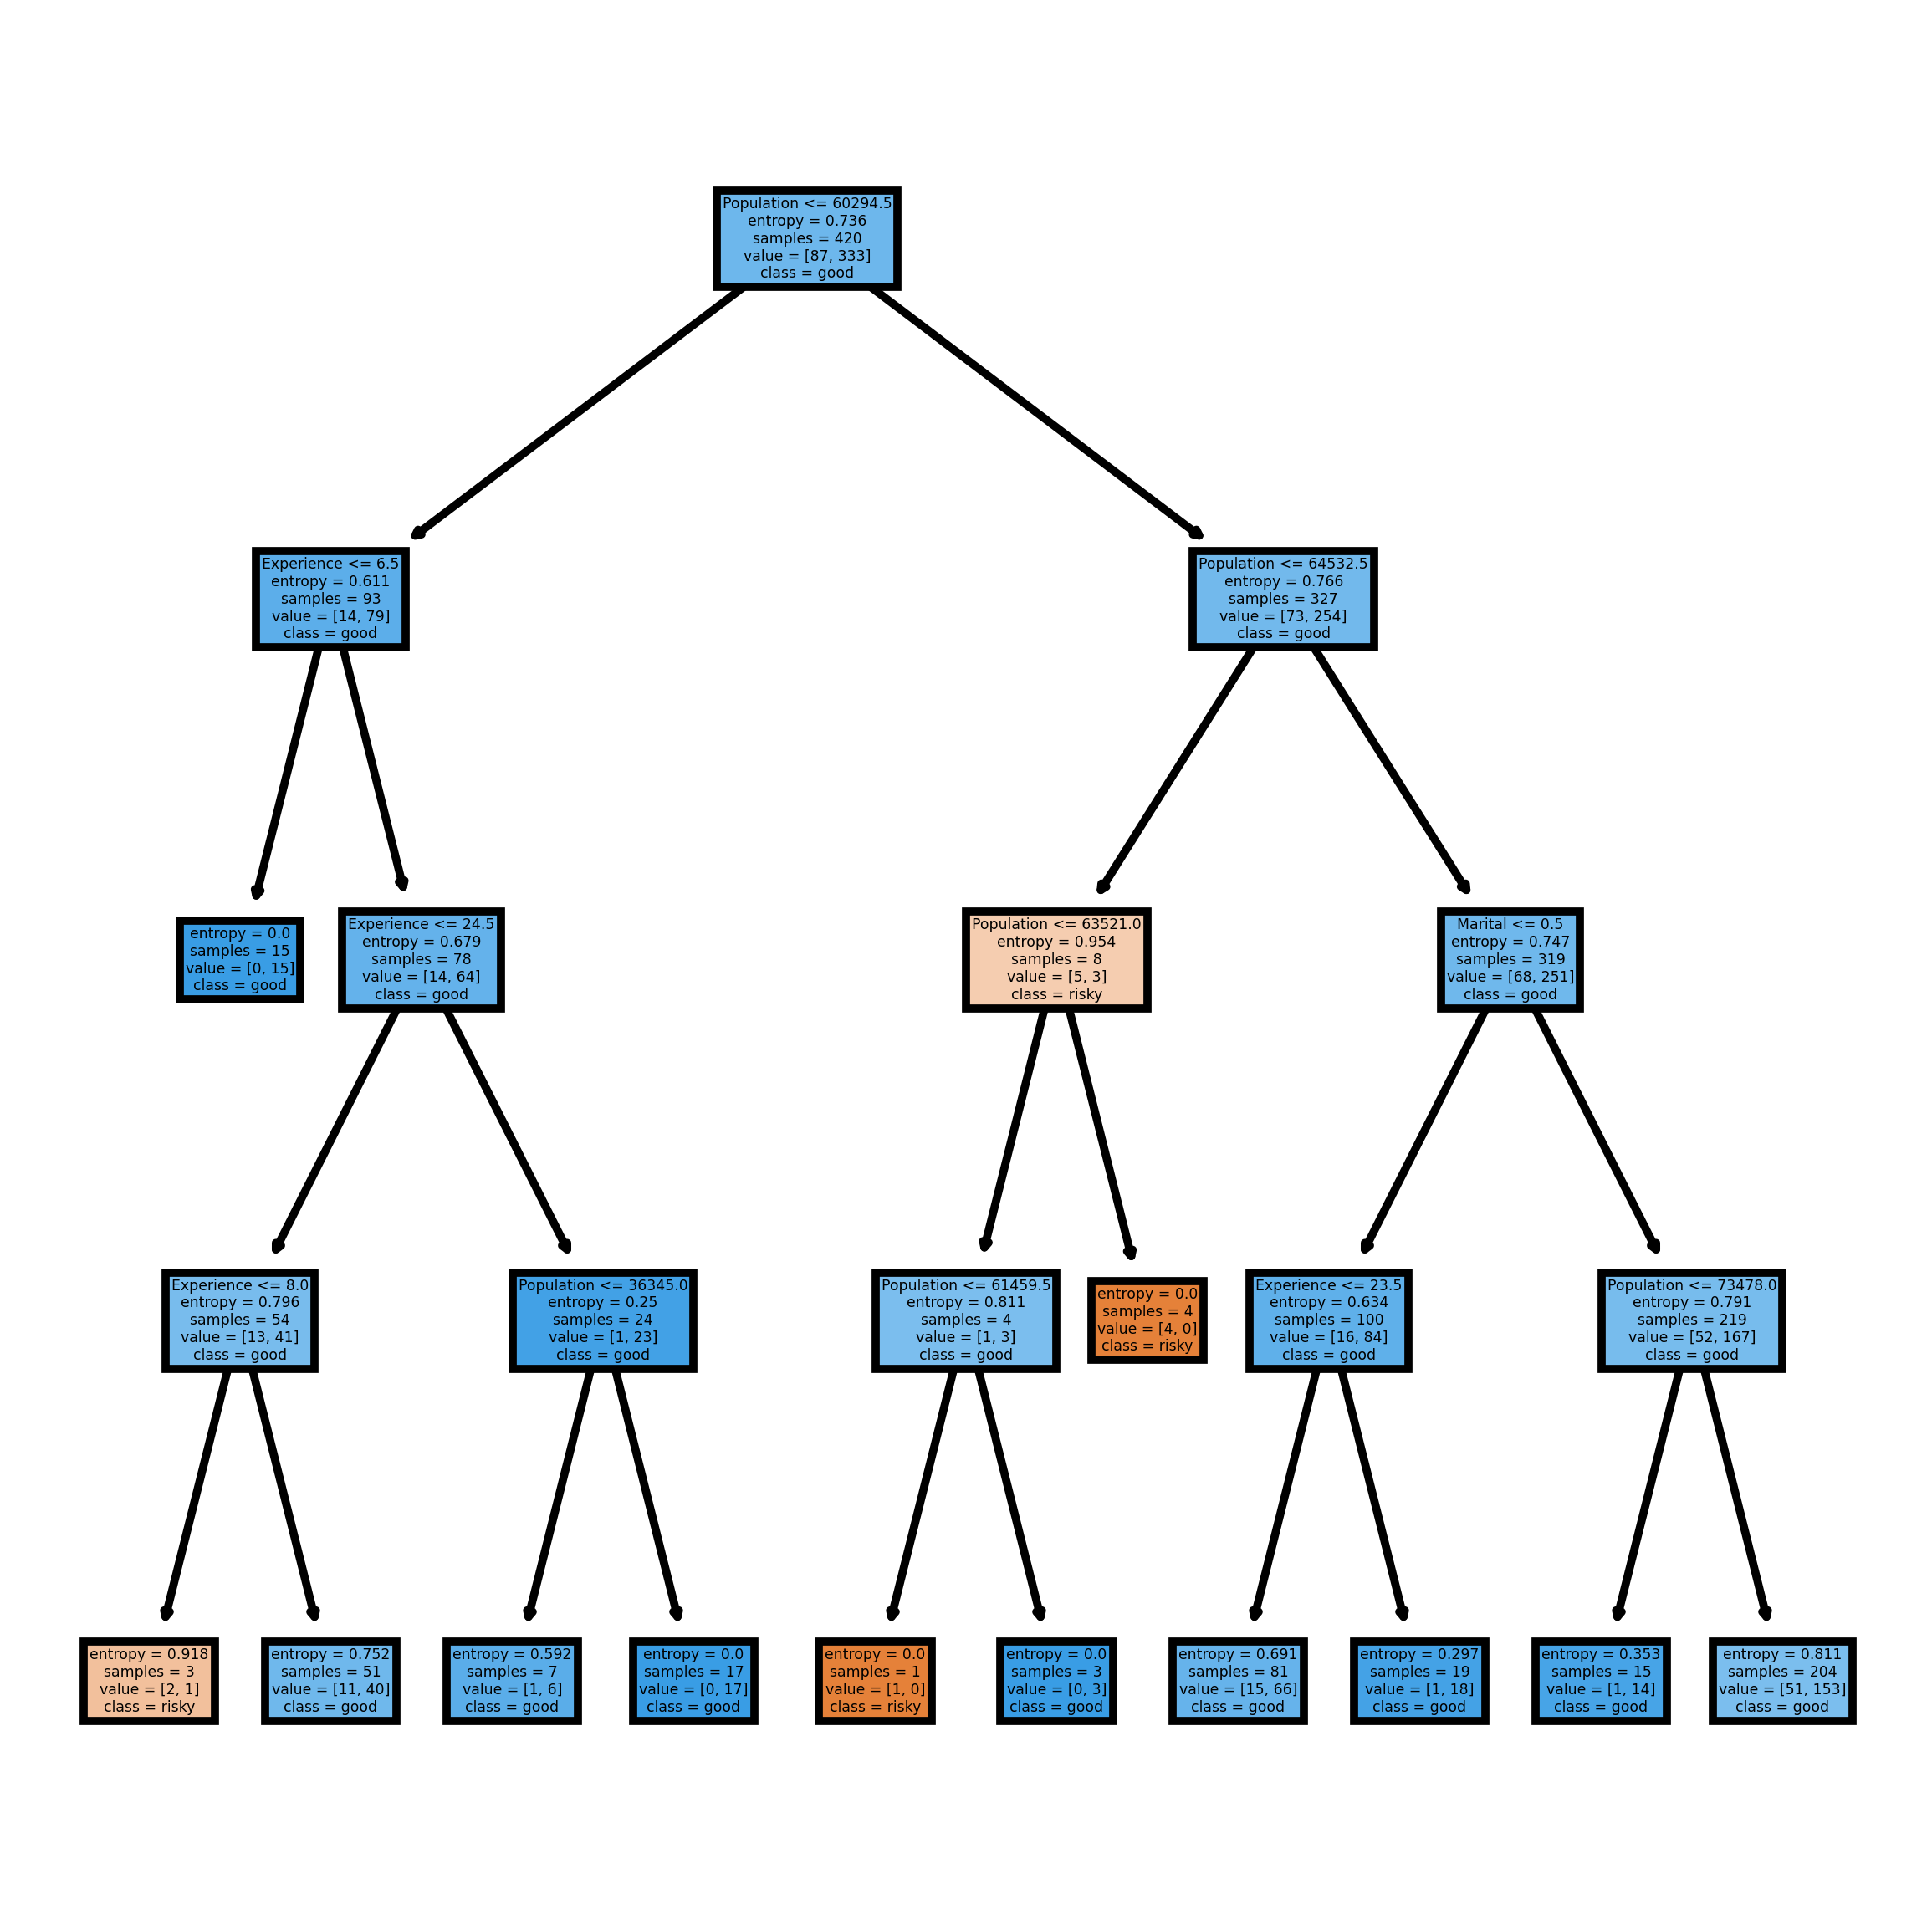

In [24]:
fn=['Undergrad', 'Marital', 'Population', 'Experience', 'Urban']
cn=['risky','good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700) 
tree.plot_tree(Model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [25]:
preds = Model.predict(x_test) 
pd.Series(preds).value_counts()

1    175
0      5
dtype: int64

In [26]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [27]:
pd.crosstab(y_test,preds)

col_0,0,1
TaxIn,,
0,1,36
1,4,139


In [28]:
np.mean(preds==y_test)

0.7777777777777778

In [29]:
accuracy_score(y_test,preds)

0.7777777777777778

In [30]:
param_grid = {'criterion' : ['entropy','gini'],
              'max_depth': [2,3,4,5,6,7,8,9,10],
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

In [31]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [32]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [33]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [34]:
model_best = DecisionTreeClassifier(criterion = 'entropy',max_depth=2,min_samples_split=2,min_samples_leaf=10)
model_best.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10)

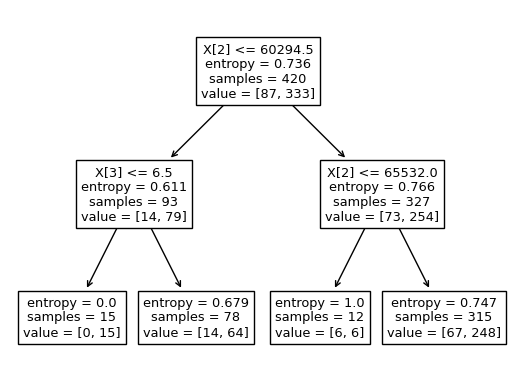

In [35]:
tree.plot_tree(model_best);
plt.show()

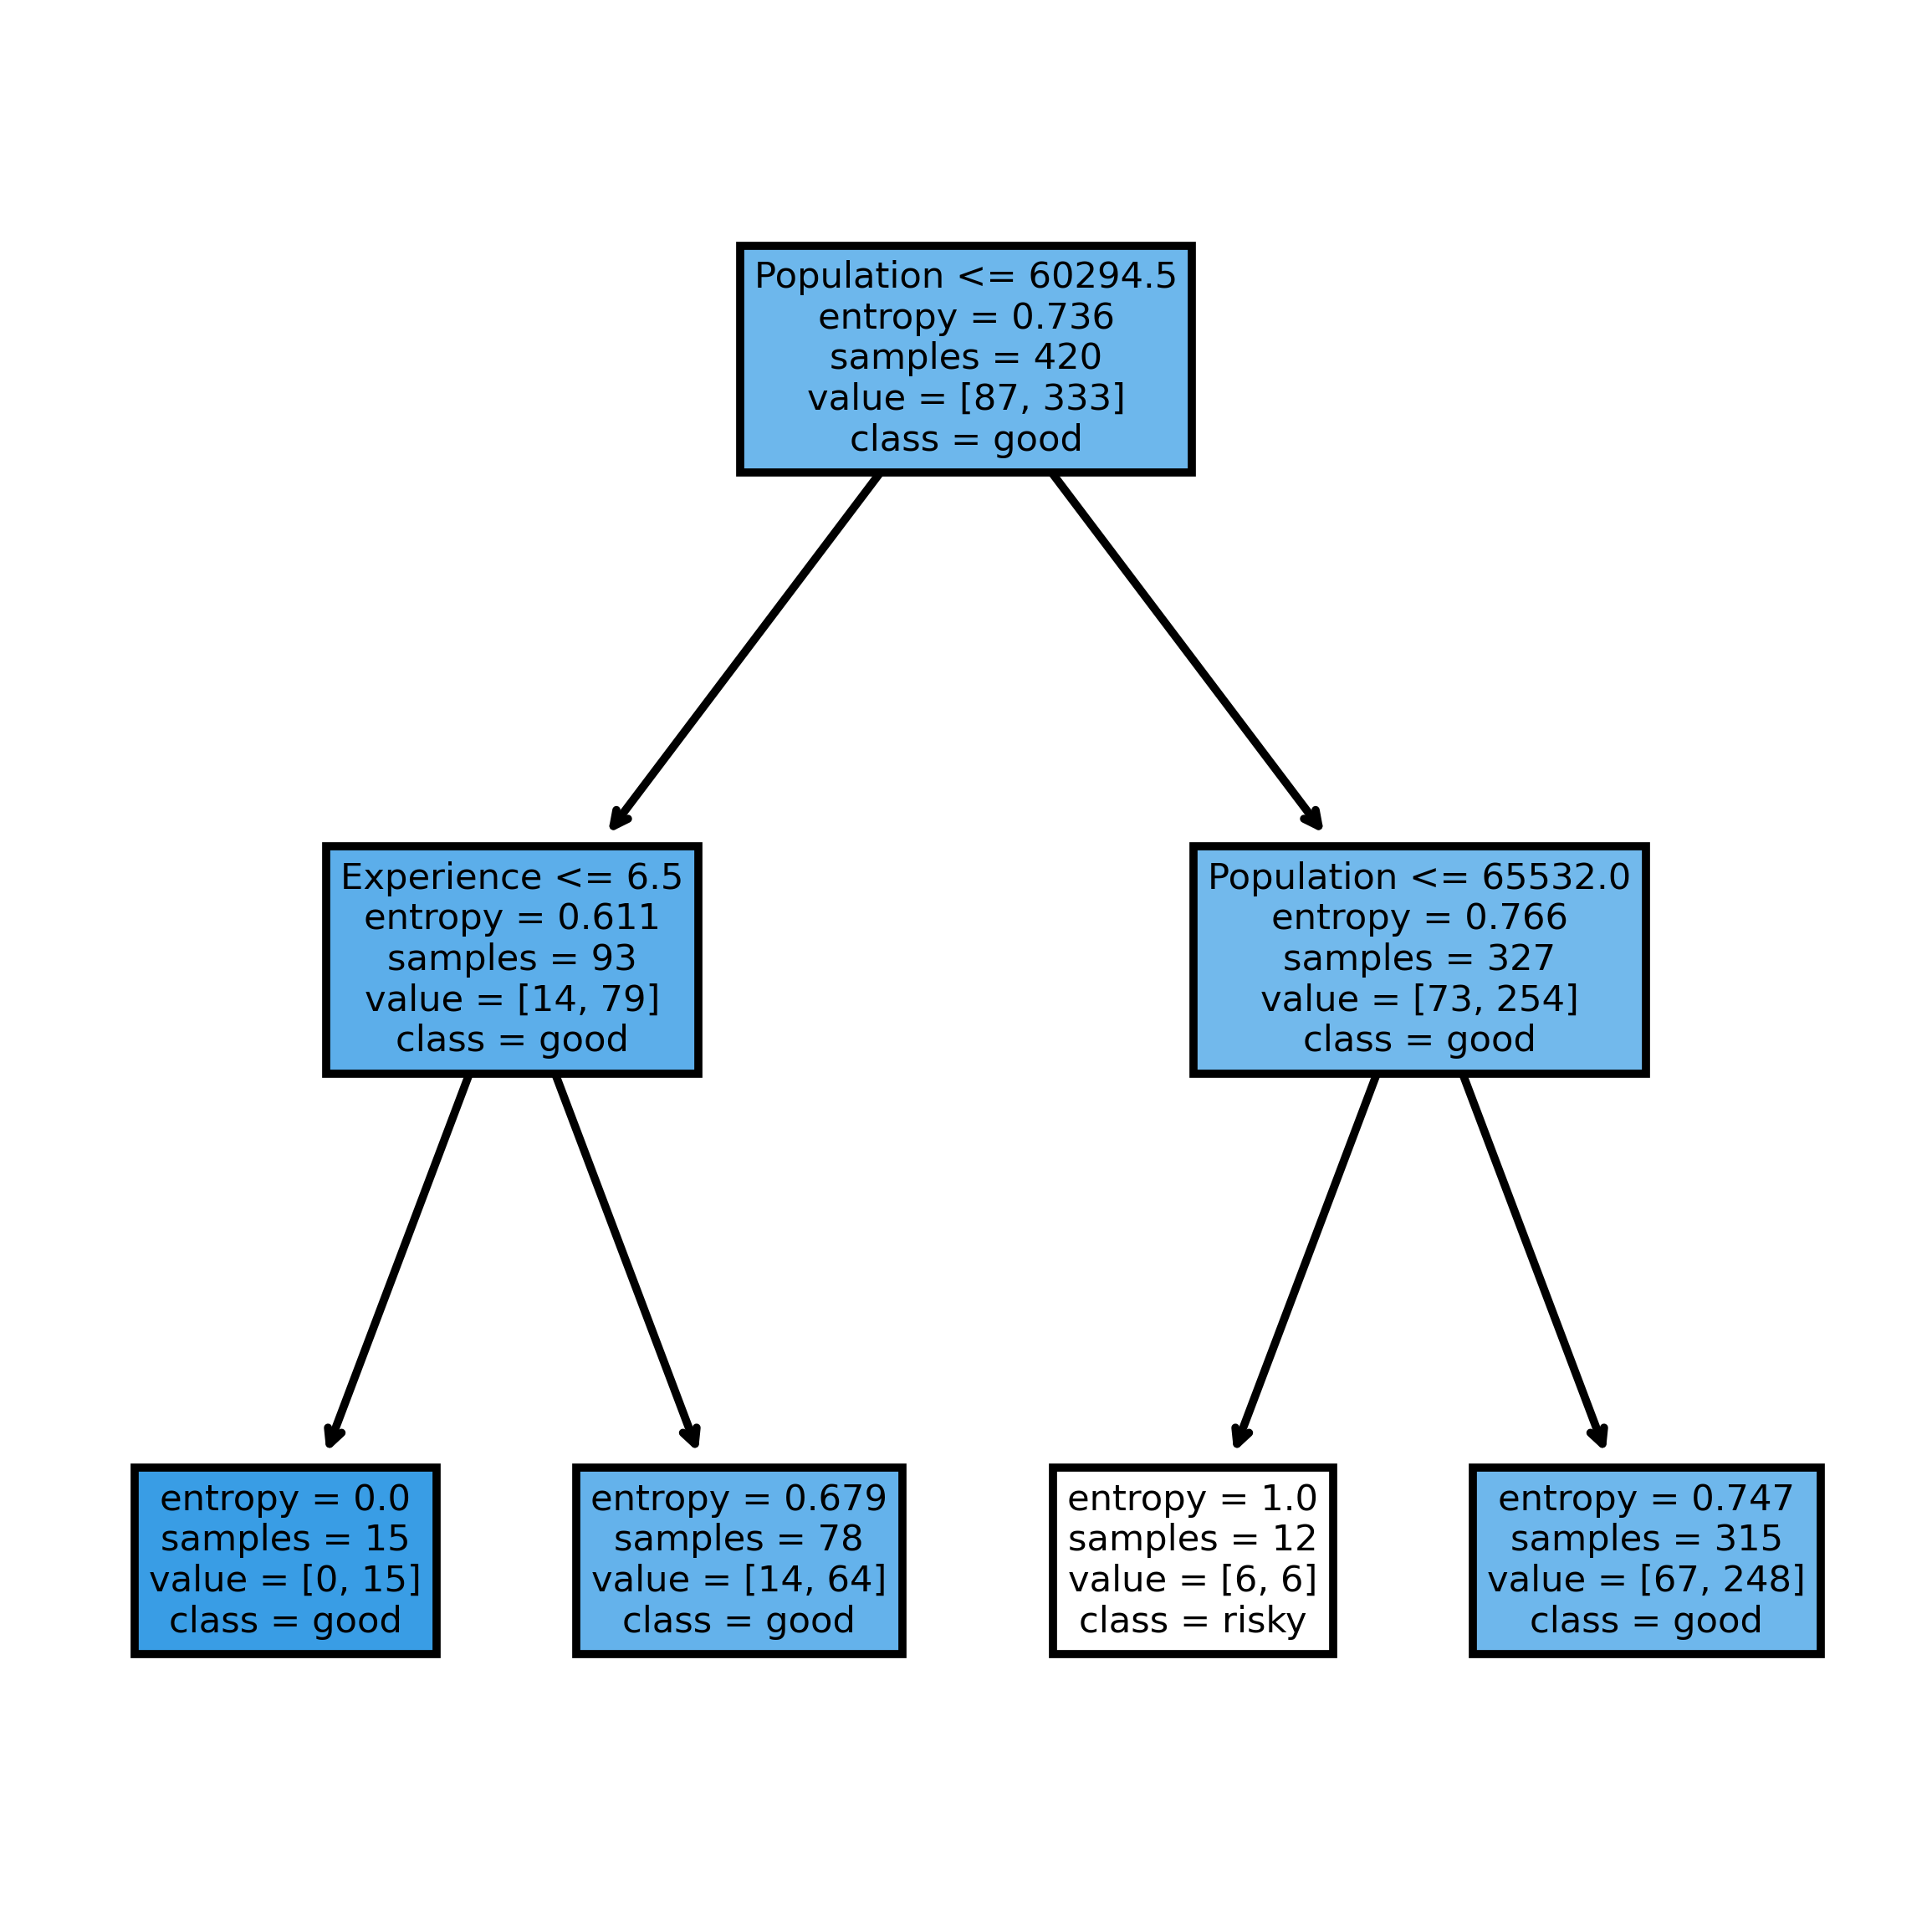

In [36]:
fn=['Undergrad', 'Marital', 'Population', 'Experience', 'Urban']
cn=['risky','good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700) # dpi is the pixel size
tree.plot_tree(model_best,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [37]:
preds_best = model_best.predict(x_test) 
pd.Series(preds_best).value_counts()

1    176
0      4
dtype: int64

In [38]:
preds_best

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [39]:
pd.crosstab(y_test,preds_best)

col_0,0,1
TaxIn,,
0,0,37
1,4,139


In [40]:
print("the accuracy of the model =",accuracy_score(y_test,preds_best)*100)

the accuracy of the model = 77.22222222222223
